# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [1]:
#install spacy in the current conda environment
!pip install spacy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 23.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 634.7/634.7 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.0/761.0 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 60.2 MB/s eta 0:00:00


In [3]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.9 MB/s eta 0:00:00 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [5]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [6]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [8]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \nMatter \nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [7]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [9]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [10]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [11]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [12]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [13]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [14]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

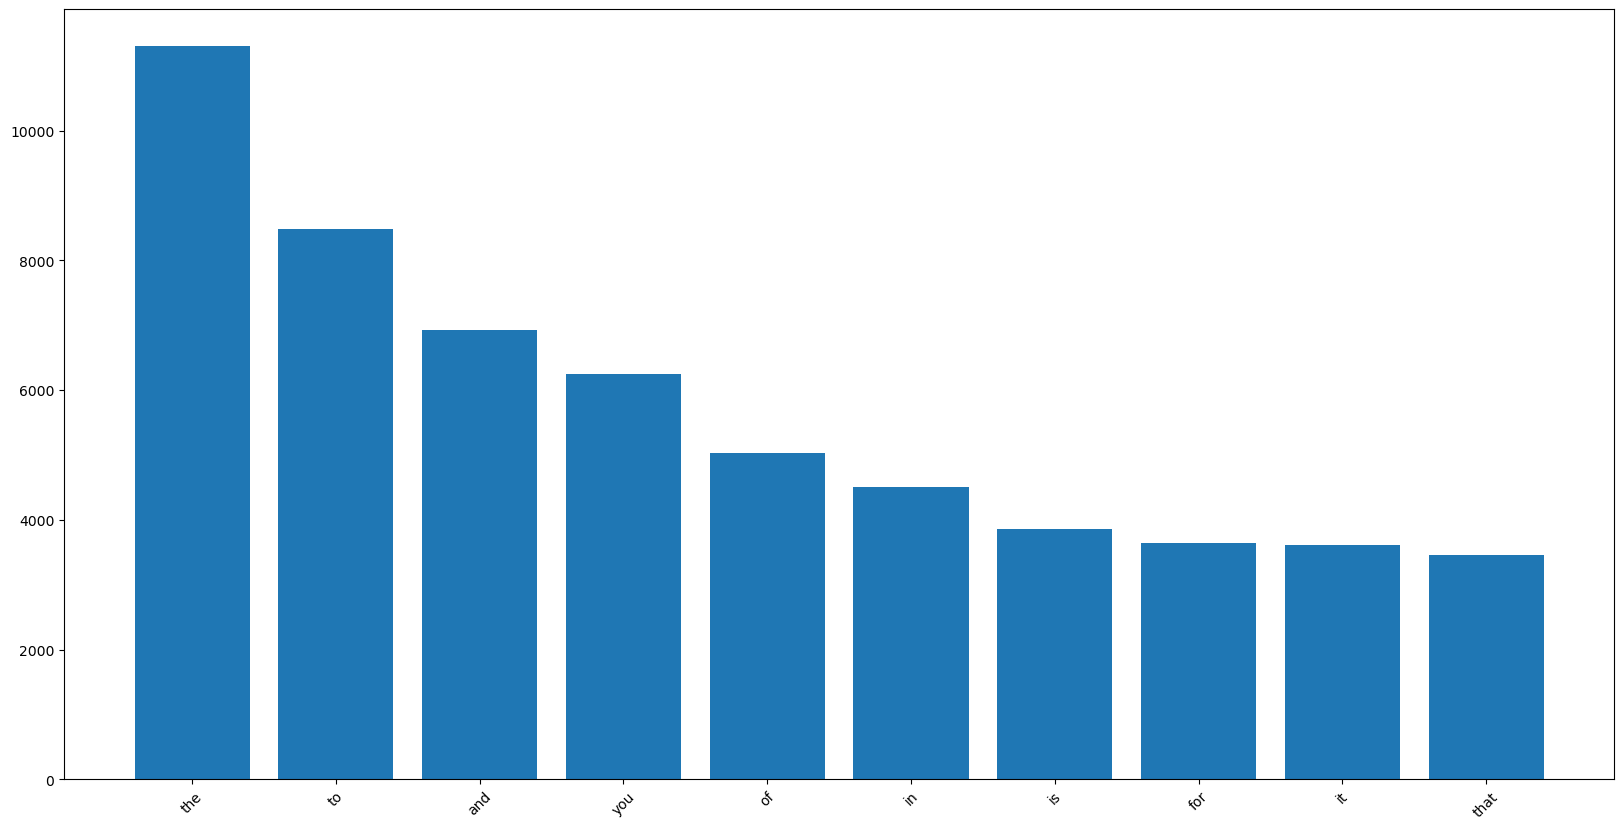

In [16]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: 

the main thing I notice here is that almost all the words on here are very simple English words that appear in almost every sentence, these words dont really offer much information and without context mean virtually nothing. I would not consider this very useful for studying a community unless the specific thing im looking for is how many times the word "the" was used. I feel like lack of context and not filtering out words that appear very often and only serve gramatical purposed like prepositions like "and" and "to" are contributing to this not being very "useful" data.

#### Lemmatization and stopword removal

In [17]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [18]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [19]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [20]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8608 sparse matrix of type '<class 'numpy.int64'>'
	with 126768 stored elements in Compressed Sparse Row format>

In [21]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not              2863
student          1183
like             1183
people           1124
class             988
                 ... 
club campus         3
open not            3
open source         3
club activity       3
luck search         3
Length: 8608, dtype: int64

In [22]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

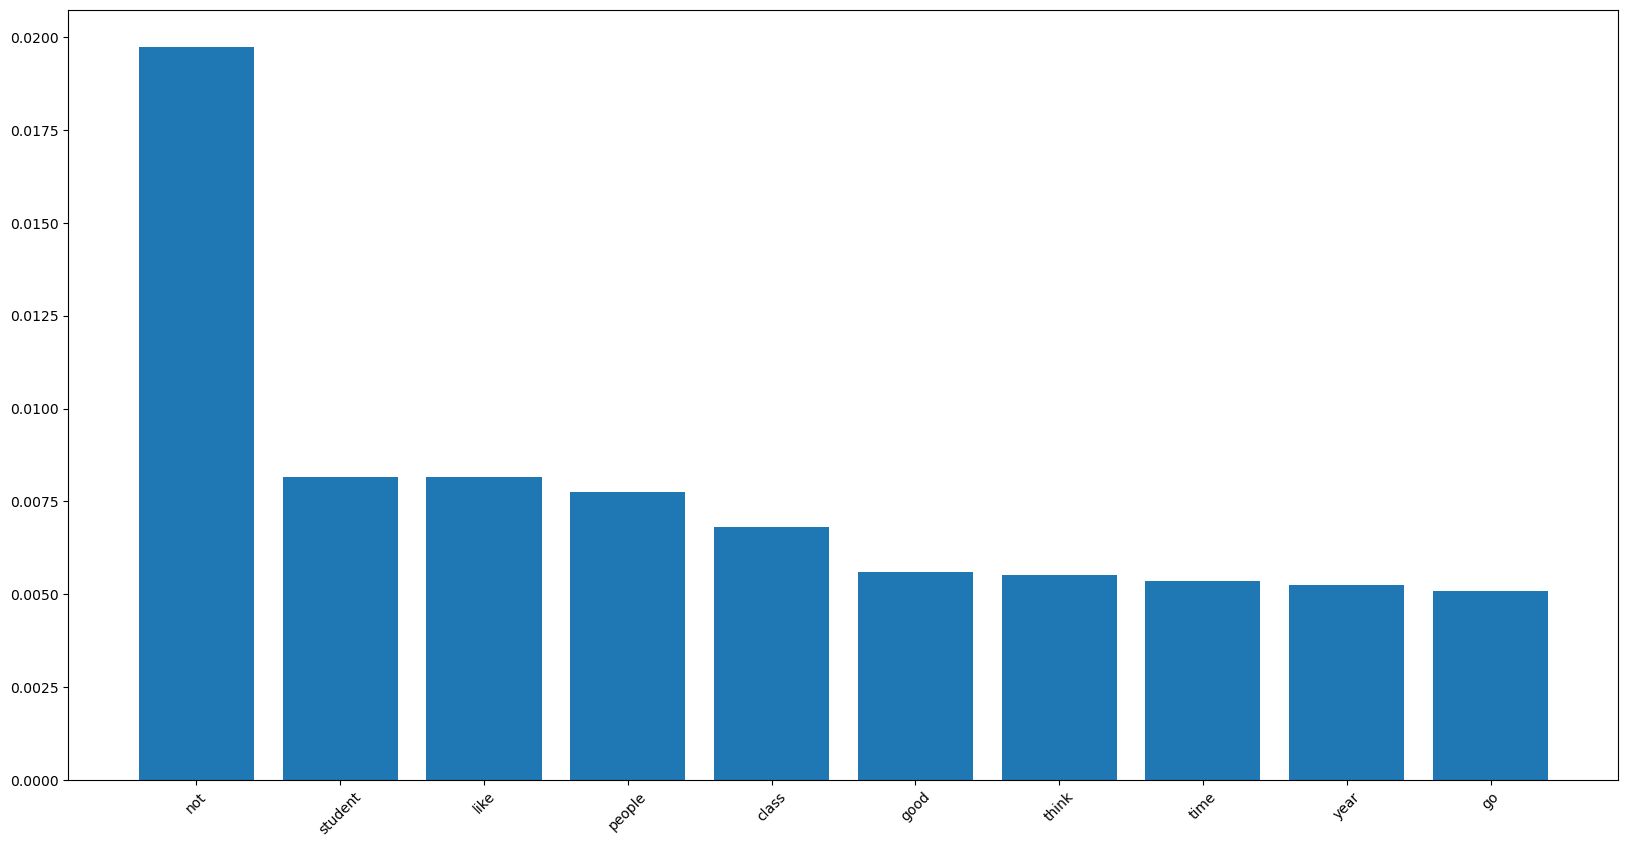

In [23]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [24]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.1400153180566765e-05

In [25]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000035
cs                  0.001228
computer            0.000262
dtype: float64

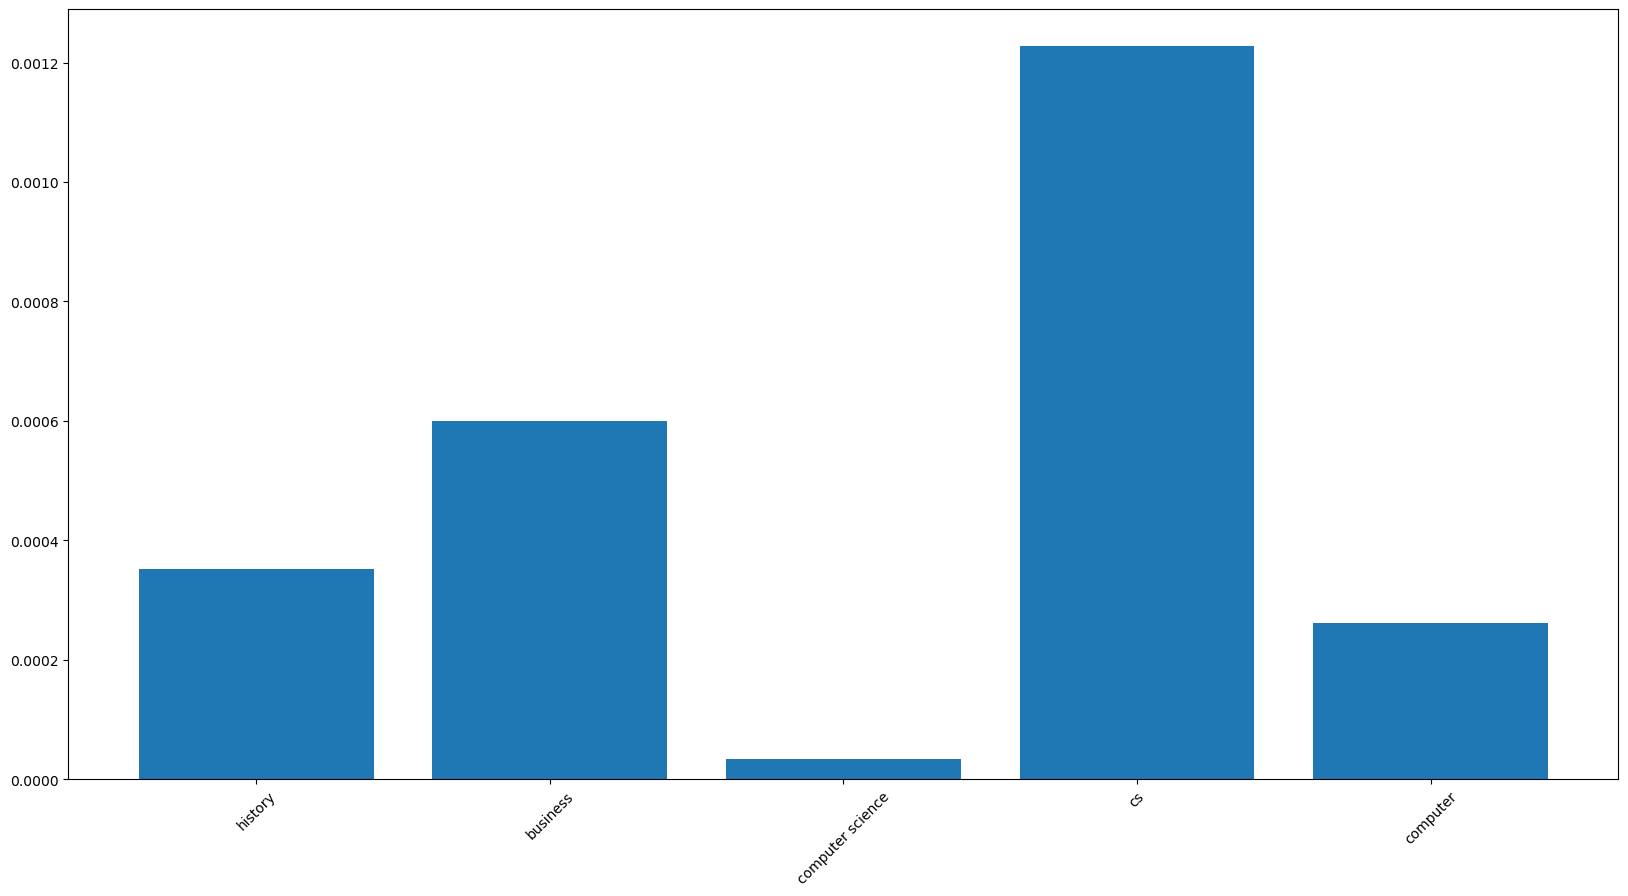

In [26]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [41]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 
plot_list=word_counts[["student", "campus", "good", "bad", "study"]]
plot_list



student    0.008163
campus     0.003050
good       0.005603
bad        0.001766
study      0.001380
dtype: float64

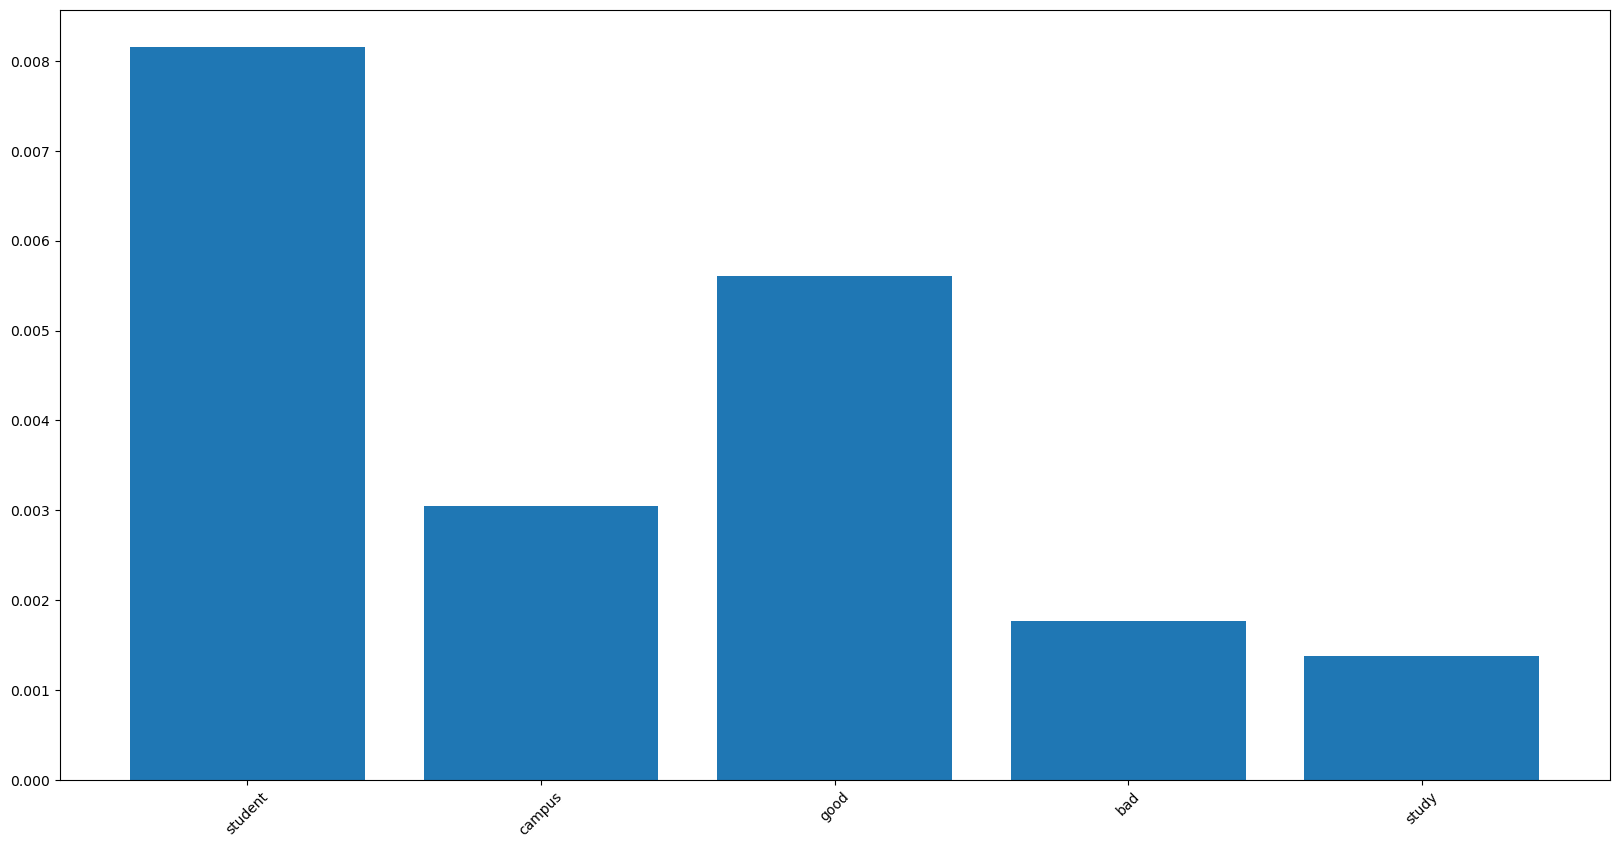

In [42]:
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell.

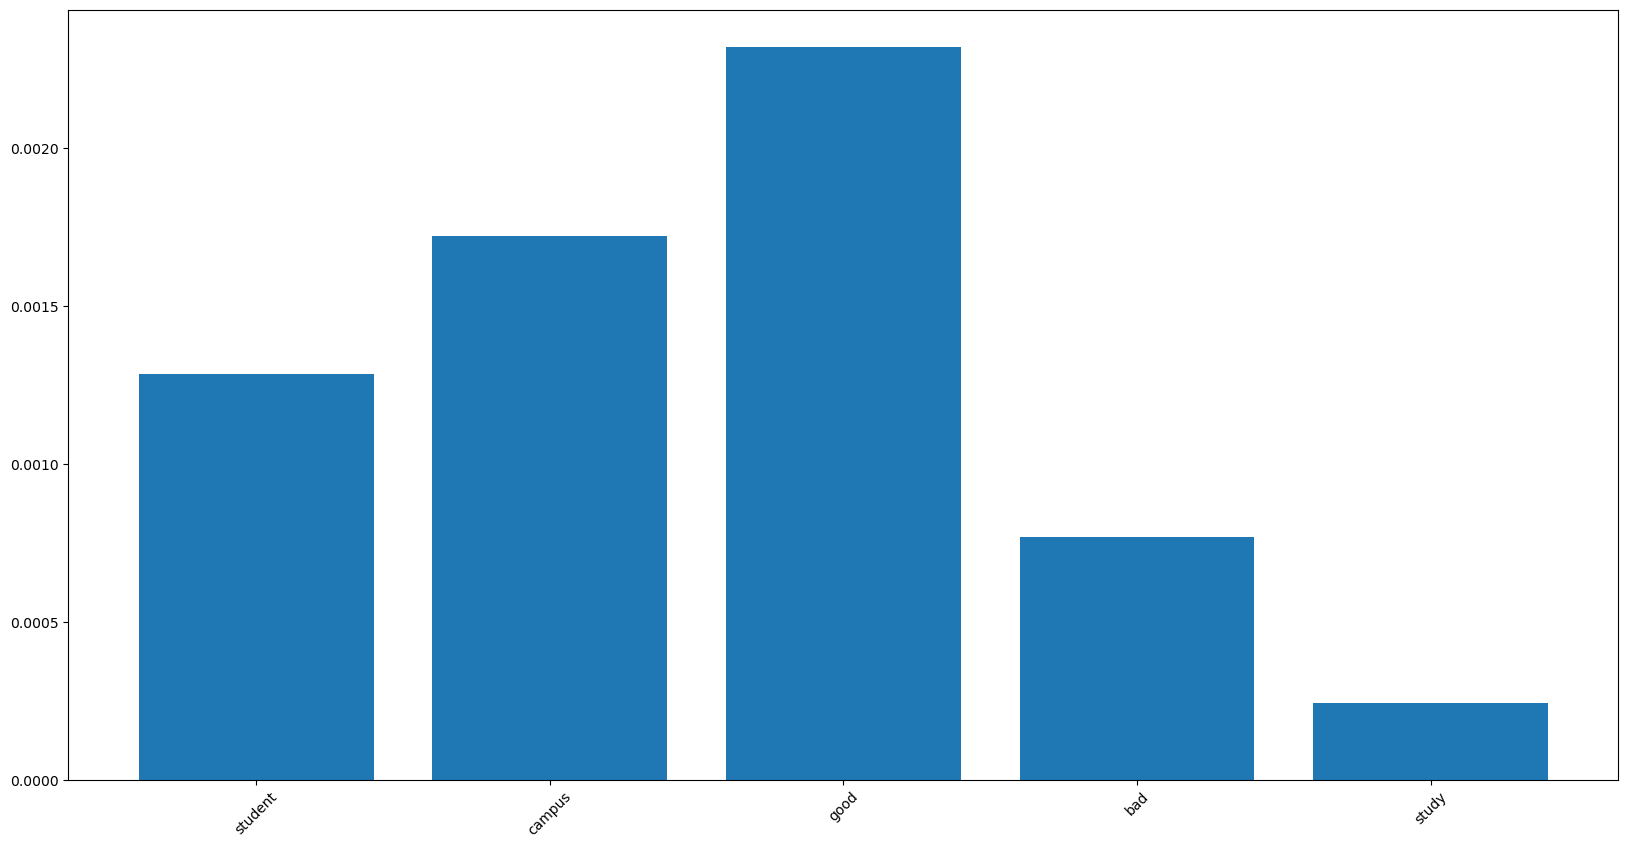

student    0.001286
campus     0.001721
good       0.002322
bad        0.000769
study      0.000242
dtype: float64

In [57]:
uiuc=pd.read_csv("uiuc.csv")

uiuc

def clean(uiuc):
    #remove newline and space characters
    uiuc = ' '.join(uiuc.split())
    #convert the text to lowercase
    uiuc = uiuc.lower()
    #remove punctuation
    uiuc = ''.join([char for char in uiuc if char.isalpha() or char.isspace()])
    return uiuc

uiuc['cleaned_text'] = uiuc['text'].apply(clean)

vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(uiuc['cleaned_text'])


bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

word_counts = word_counts / word_counts.sum()


plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

plot_list=word_counts[["student", "campus", "good", "bad", "study"]]
plot_list

In [ ]:
###same code is able to just look at both datasets and look at the same words and make graphs out of it which I just find facinating as someone with very limited expiercne with this.

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [73]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the datasets
uiuc = pd.read_csv("uiuc.csv")
mich = pd.read_csv("umich.csv")

# Sample mich dataset to have an even number of samples
mich = mich.sample(n=4725, random_state=42)

# Assign labels based on origin subreddit of comment
uiuc['label'] = 1  # Label for uiuc dataset
mich['label'] = 0  # Label for mich dataset

# Combine the datasets
data = pd.concat([uiuc, mich], ignore_index=True)


In [ ]:
#clean and lemmatize the data csv

#assumed that the csv files are already cleaned and lemmatized

In [74]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['text'])  # Assuming 'text' column contains comments
y = data['label']


In [75]:
#train a logistic regression model using the bag of words features as X and the label column as y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [76]:
#report the accuracy of the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.72


#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'X' is the bag-of-words matrix and 'y' is the label column
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model on the training data
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy on Test Data: {accuracy:.2f}")


Model Accuracy on Test Data: 0.74


#### Part 3: Examine the top features of your model using the following code

In [ ]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming data is already loaded and cleaned using your clean() function
uiuc = pd.read_csv("uiuc.csv")
mich = pd.read_csv("umich.csv")

uiuc['cleaned_text'] = uiuc['text'].apply(clean)
mich['cleaned_text'] = mich['text'].apply(clean)

# Assign labels
uiuc['label'] = 1
mich['label'] = 0

# Combine datasets
data = pd.concat([uiuc, mich], ignore_index=True)

# Bag-of-Words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['cleaned_text'])
y = data['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Get coefficients and feature names
coefficients = model.coef_[0]
feature_names = vectorizer.get_feature_names_out()

# Create DataFrame for coefficients
coef_df = pd.DataFrame({'word': feature_names, 'coefficient': coefficients})
coef_df = coef_df.sort_values(by='coefficient')

# Extract top 10 positive and negative coefficients
most_positive = coef_df.tail(10)
most_negative = coef_df.head(10)

# Plotting top positive and nega


In [ ]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [87]:
import pandas as pd
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models.phrases import Phrases
import matplotlib.pyplot as plt

# Load the UIUC subreddit data
uiuc = pd.read_csv("uiuc.csv")

# Preprocessing function for tokenization and lemmatization
def preprocess(text):
    # Tokenize text
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text.lower())  # Lowercase and tokenize
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if len(token) > 1]
    
    return tokens

# Apply preprocessing to the text column
uiuc['tokens'] = uiuc['text'].apply(preprocess)

# Build bigrams
bigram = Phrases(uiuc['tokens'], min_count=20)
uiuc['tokens'] = [bigram[tokens] for tokens in uiuc['tokens']]

# Create a dictionary representation of the documents
dictionary = Dictionary(uiuc['tokens'])

# Filter out rare and common tokens
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Create a bag-of-words representation of the documents
corpus = [dictionary.doc2bow(tokens) for tokens in uiuc['tokens']]

# Train the LDA model
num_topics = 10  # Number of topics to extract
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    passes=10,
    iterations=400,
    random_state=42,
    alpha='auto',
    eta='auto'
)

# Display the top words for each topic
print("Top words per topic:")
for i, topic in lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
    print(f"Topic {i}: {[word for word, _ in topic]}")

# Analyze comments with high frequencies of each topic
print("\nExample comments per topic:")
for topic_id in range(num_topics):
    print(f"\nTopic {topic_id}:")
    
    # Find documents with high contribution to this topic
    topic_docs = [(doc_id, score) for doc_id, doc in enumerate(corpus)
                  if any(topic == topic_id and score > 0.5 for topic, score in lda_model.get_document_topics(doc))]
    
    # Print a few example comments from these documents
    for doc_id, _ in topic_docs[:3]:  # Limit to 3 comments per topic
        print(f"- {uiuc['text'].iloc[doc_id]}")


Top words per topic:
Topic 0: ['he', 'for', 'thank_you', 'my', 'him', 'got', 'to', 'lol', 'but', 'this']
Topic 1: ['and', 'to', 'it', 'you', 'the', 'of', 'friend', 'in', 'with', 'your']
Topic 2: ['http', 'http_www', 'this', 'com', 'the', 'uiuc', 'is', 'on', 'no', 'post']
Topic 3: ['and', 'in', '10', 'at', 'the', 'bike', 'or', 'illinois_edu', 'if_you', 'still']
Topic 4: ['it', 'to', 'water', 'just', 'you', 'what', 'is', 'do', 'know', 'that']
Topic 5: ['the', 'they', 'to', 'and', 'is', 'it', 'of', 'that', 'not', 'but']
Topic 6: ['the', 'in', 'wa', 'and', 'it', 'of', 'my', 'that', 'to', 'for']
Topic 7: ['the', 'to', 'and', 'you', 'for', 'of', 'in', 'is', 'your', 'have']
Topic 8: ['to', 'you', 'have', 'the', 'this', 'is', 'that', 'do', 'all', 'we']
Topic 9: ['you', 'to', 'it', 'are', 'that', 'the', 'and', 'is', 'in', 'not']

Example comments per topic:

Topic 0:


NameError: name 'score' is not defined